In [1]:
import numpy as np
import diffraction as diff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time as time
from matplotlib.widgets import Button
import scipy.io
from matplotlib.widgets import RangeSlider
import scipy.ndimage as ndimage
# import scipy.ndimage as filters

In [2]:
# use thetax and thetay to adjust initial orientation of the sample
thetax=np.pi/2*1
thetay=np.pi/2*0
hkl_dimension=10

# sigma_theta, if you need a small number for single crystal, input~0.01, if you need infinity, input~1000
sigma1=0.02

# sigma_phi
sigma2=1000

# sigma_r, use this to tune the peak linewidth
sigma3=0.01

# settings for imagine plane
resolutionx=300
qxymax=2.5
qzmax=3
qzmin=0

resolutionz=int(resolutionx/qxymax*qzmax)
gridx,gridz=np.meshgrid(np.linspace(-qxymax,qxymax,resolutionx),np.linspace(qzmin,qzmax,resolutionz))

In [3]:
# read crystal structure(POSCAR file which can be converted easily from cif on VESTA)
dirr = ''
filename = 'MA2DMF2Pb3I8_Petrov2017'
# filename = 'MA2DMF2Pb2I6_Petrov2017'
address = dirr + filename +'.vasp'
a1,a2,a3,positions=diff.read_poscar(address) # example (graphite)
Bpeaks,Mqxy,Mqz,I_miller = diff.Bragg_peaks(a1,a2,a3,positions,thetax,thetay,hkl_dimension)
# Bpeaks = diff.diffuse(a1,a2,a3,positions,thetax,thetay,hkl_dimension,0)
# Bpeaks.shape


In [4]:
t1_start = time.process_time()
# calculated GIWAXS pattern
III=diff.intensity(gridx,gridz,Bpeaks,sigma1,sigma2,sigma3,hkl_dimension)
t1_stop = time.process_time()
print('cpu time =')
print(t1_stop-t1_start,'s')

cpu time =
17.78028 s


In [49]:
 # make the plot
colorbar=0.5   # upper limit
    
# II1=np.log(III+1)

II1=III

fig,ax=plt.subplots(figsize=(14,14))

plt.imshow(II1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[-qxymax, qxymax, qzmin, qzmax],
               vmax=colorbar*II1.max(), vmin=II1.min())
ax.set_xlabel('q$_{xy}$(1/A)',fontsize=16)
ax.set_ylabel('q$_{z}$(1/A)',fontsize=16)
ax.set_title(filename+' GIWAXS simulation',fontsize=16)
fig.set_size_inches([17,10])
# plt.savefig(dirr + filename +'_1' +'.pdf')
# plt.savefig('2anc2_log.pdf')
# scipy.io.savemat(dirr+filename+'.mat', {'a': III})

In [52]:
# peak finder
file_path = 'test1.csv'
data = np.genfromtxt(file_path, delimiter=',', skip_header=0)
data=np.nan_to_num(data)
# data = II1
# data = np.log(data+3)
colorbar=0.05

qxymax=3
qxymin=-3
qzmin=-3
qzmax=3


neighborhood_size = 70
threshold = 0.001*data.max()
print_peak_position=False

diff.GIWAXS_peak_finder(data,neighborhood_size,threshold,print_peak_position,
                       qzmax,qxymax,qzmin,colorbar)
plt.imshow(data, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[qxymin, qxymax, qzmin, qzmax],
               vmax=colorbar*data.max(), vmin=data.min())

[[1.60901888e+00 2.16122505e+00]
 [1.50881525e+00 2.16122505e+00]
 [1.83440386e+00 1.44081670e+00]
 [1.67605280e+00 1.44081670e+00]
 [1.55317879e+00 1.44081670e+00]
 [1.47467679e+00 1.44081670e+00]
 [1.92727412e+00 7.20408351e-01]
 [1.75331990e+00 7.20408351e-01]
 [1.61027069e+00 7.20408351e-01]
 [1.50695343e+00 7.20408351e-01]
 [1.45187516e+00 7.20408351e-01]
 [1.83953112e+00 8.82276106e-17]
 [1.67879286e+00 8.82276106e-17]
 [1.47124933e+00 8.82276106e-17]
 [1.44094865e+00 8.82276106e-17]
 [1.95691562e+00 2.16122505e+00]
 [1.69854751e+00 2.16122505e+00]
 [1.21385384e+00 2.16122505e+00]
 [1.00313197e+00 2.16122505e+00]
 [8.35584984e-01 2.16122505e+00]
 [1.83332017e+00 1.44081670e+00]
 [1.57839581e+00 1.44081670e+00]
 [1.33442860e+00 1.44081670e+00]
 [1.10867578e+00 1.44081670e+00]
 [9.14724089e-01 1.44081670e+00]
 [7.76771682e-01 1.44081670e+00]
 [1.71106068e+00 7.20408351e-01]
 [1.46038512e+00 7.20408351e-01]
 [8.38026401e-01 7.20408351e-01]
 [7.37338395e-01 7.20408351e-01]
 [1.675171

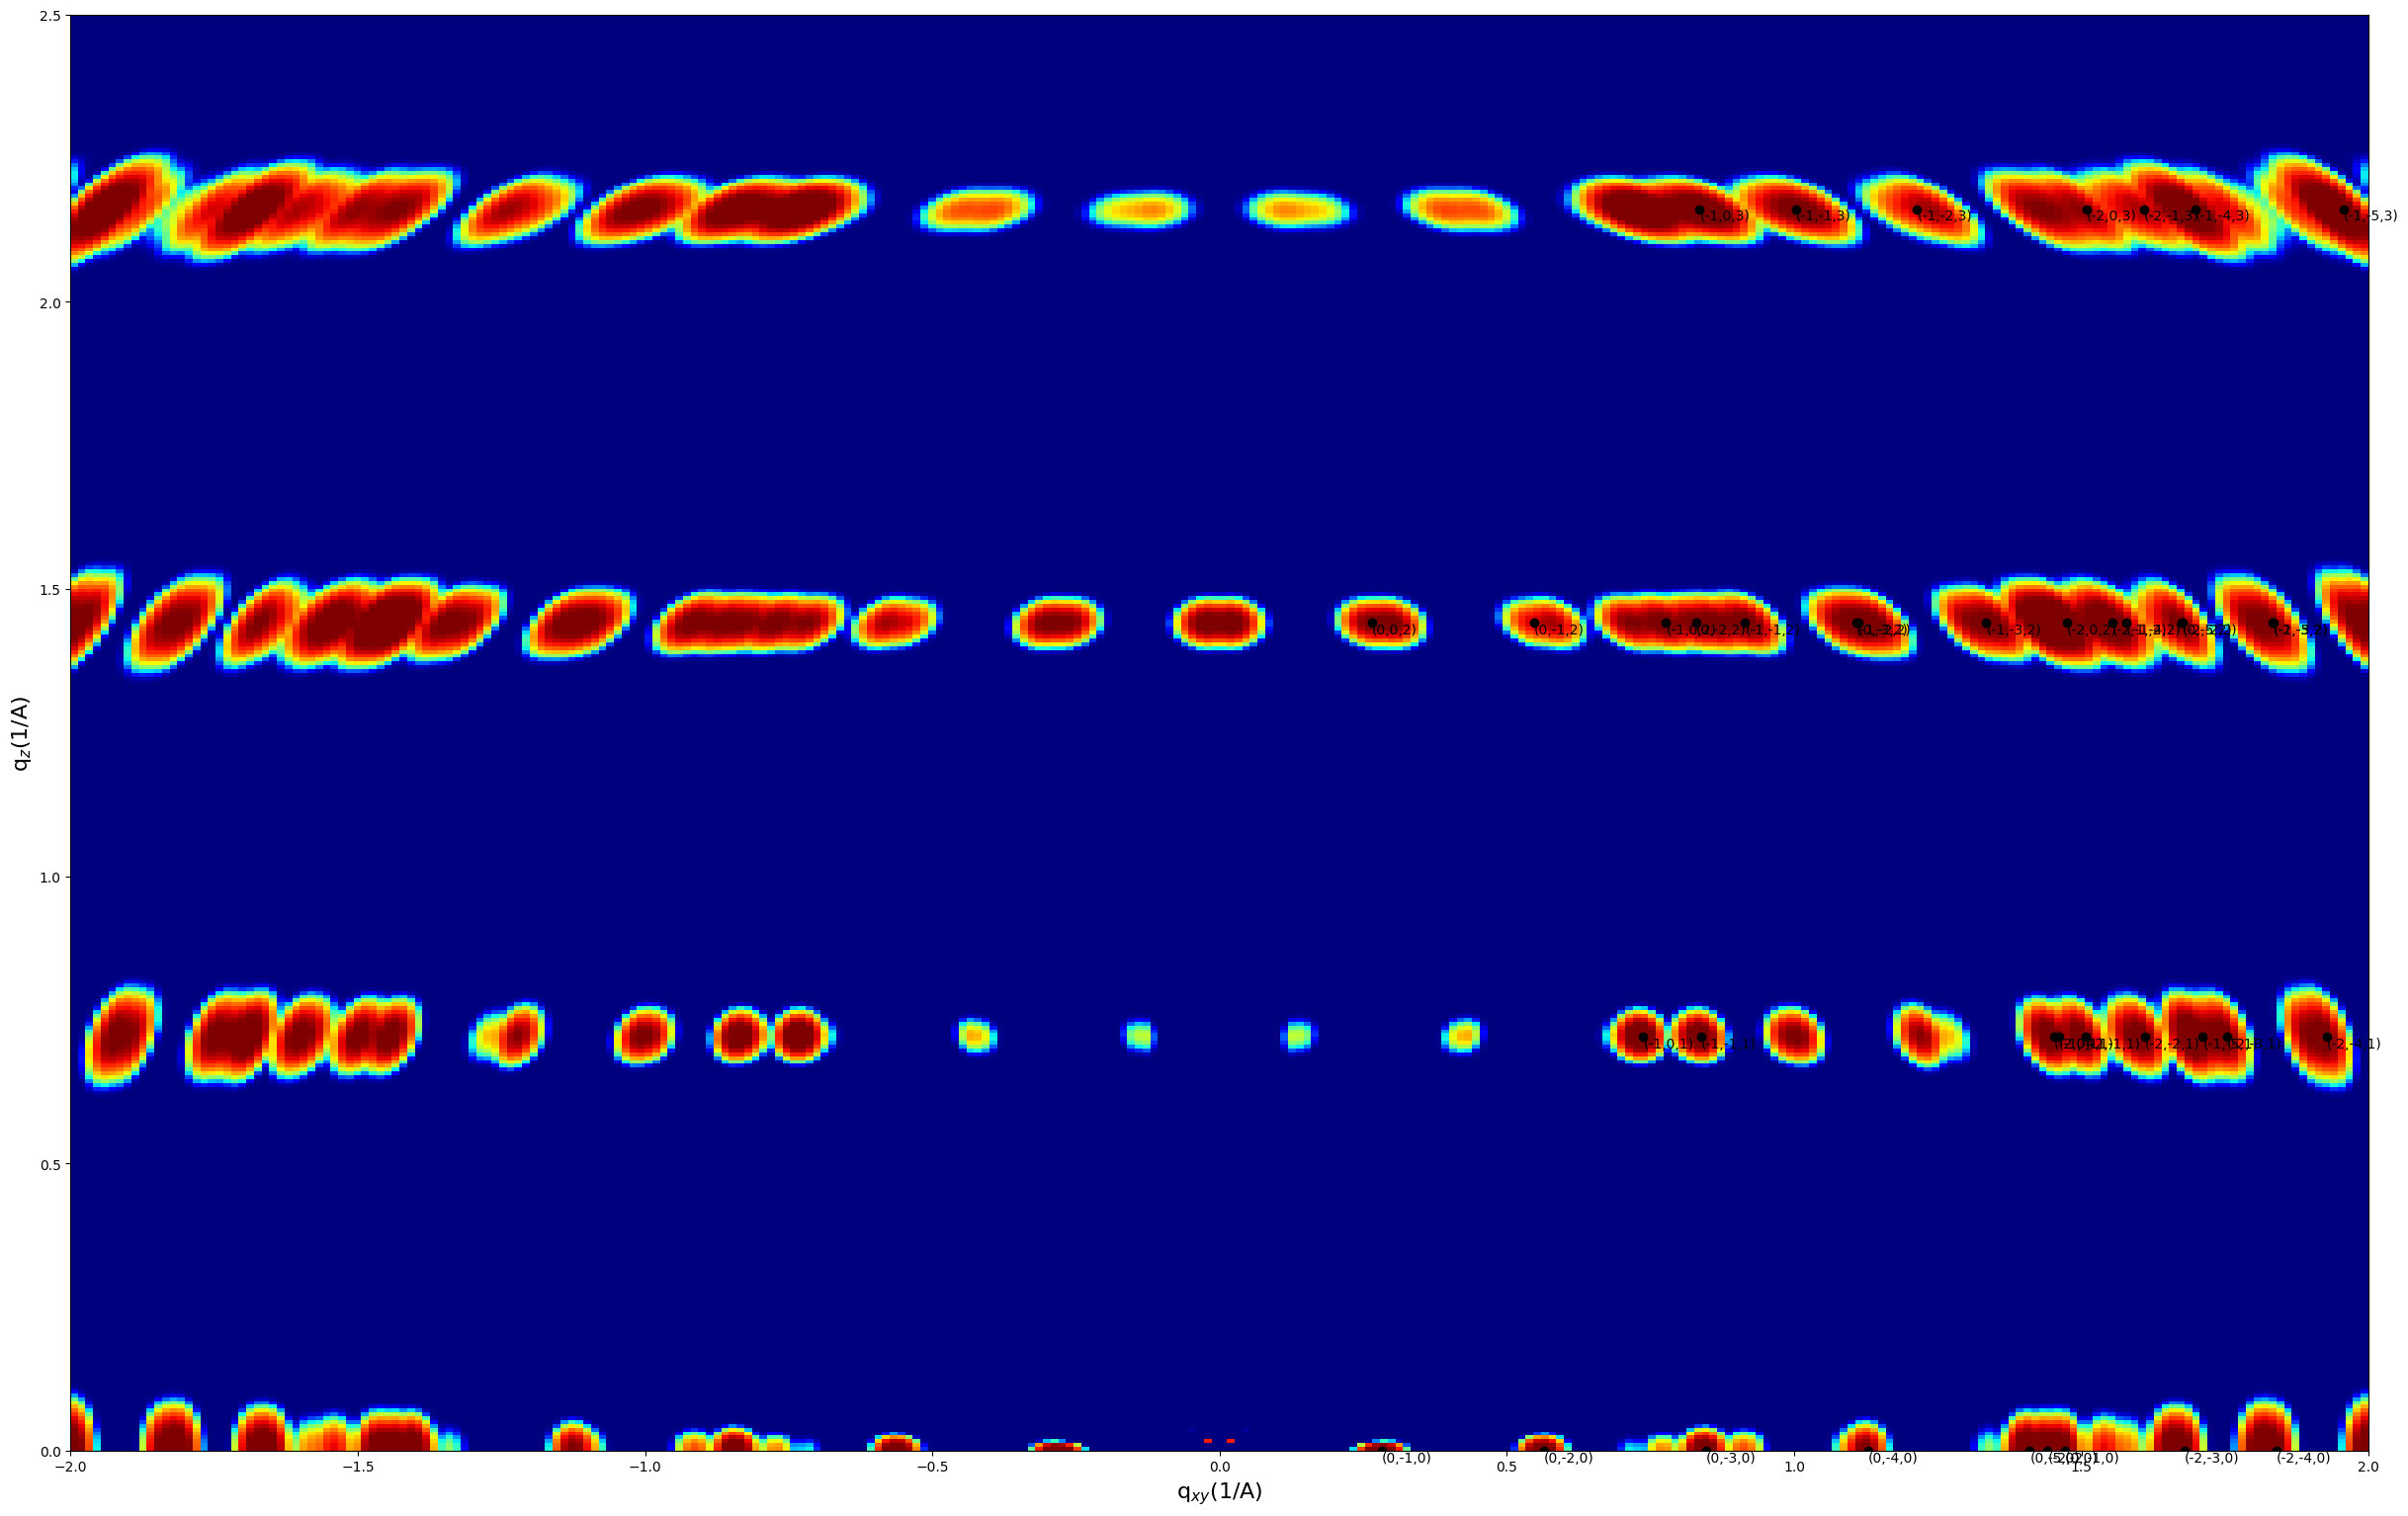

In [26]:
# index generated from cif
data = II1
data = np.log(II1+1)
colorbar=0.9

fsize=(30,30)
qrange=[-qxymax, qxymax, qzmin, qzmax]
Mindexrange=np.linspace(0,hkl_dimension,hkl_dimension+1)
Mindexrange=Mindexrange.astype('int')

Cutoff_I=0.01

def Mindexing(data,colorbar,fsize,qrange,Mindexrange,I_miller,Cutoff_I,Mqxy,Mqz):
    simuposi=np.zeros([100,2])
    isimuposi=0
    fig,ax=plt.subplots(figsize=fsize)
    plt.imshow(data, interpolation='nearest', cmap=cm.jet,
                   origin='lower', extent=qrange,
                   vmax=colorbar*data.max(), vmin=data.min())
    plt.xlabel('q$_{xy}$(1/A)',fontsize=16)
    plt.ylabel('q$_{z}$(1/A)',fontsize=16)
    
    MaxI=0
    for h in Mindexrange:
        for k in Mindexrange:
            for l in Mindexrange:
                if Mqxy[h,k,l]<qxymax and Mqz[h,k,l]>qzmin and Mqz[h,k,l]<qzmax:
                    MaxI=np.maximum(I_miller[h,k,l],MaxI)
                    
    for h in Mindexrange:
        for k in Mindexrange:
            for l in Mindexrange:
                if Mqxy[h,k,l]<qxymax and Mqz[h,k,l]>qzmin and Mqz[h,k,l]<qzmax:
                    if I_miller[h,k,l]>Cutoff_I*MaxI:
                        plt.plot(Mqxy[h,k,l],Mqz[h,k,l], 'ko')
                        simuposi[isimuposi,0]=Mqxy[h,k,l]
                        simuposi[isimuposi,1]=Mqz[h,k,l]
                        isimuposi=isimuposi+1
                        textstr='('+str(h-hkl_dimension)+','+str(l-hkl_dimension)+','+str(-k+hkl_dimension)+')'
                        plt.text(Mqxy[h,k,l]/(2*qxymax)+0.5, (Mqz[h,k,l]-qzmin)/(qzmax-qzmin), textstr, 
                                 transform=ax.transAxes, fontsize=10,verticalalignment='top',color='k')
    return simuposi
    
    
simuposi=Mindexing(data,colorbar,fsize,qrange,Mindexrange,I_miller,Cutoff_I,Mqxy,Mqz)
print(simuposi)
# plt.savefig(dirr + filename +'_1' +'.pdf')

In [94]:
def phid1(theta00,data,exp_peak_postions):
    thetax=np.pi/2*0
    thetay=np.pi/2*theta00
    hkl_dimension=5

    # sigma_theta, if you need a small number for single crystal, input~0.01, if you need infinity, input~1000
    sigma1=0.03

    # sigma_phi
    sigma2=1000

    # sigma_r, use this to tune the peak linewidth
    sigma3=0.03

    # settings for imagine plane
    resolutionx=300
    qxymax=2
    qzmax=2
    qzmin=0.2

    resolutionz=int(resolutionx/qxymax*qzmax)
    gridx,gridz=np.meshgrid(np.linspace(-qxymax,qxymax,resolutionx),np.linspace(qzmin,qzmax,resolutionz))
    dirr = ''
    filename = 'S-NPB'
    address = dirr + filename +'.vasp'
    a1,a2,a3,positions=diff.read_poscar(address) # example (graphite)
    print(thetay)
    Bpeaks,Mqxy,Mqz,I_miller = diff.Bragg_peaks(a1,a2,a3,positions,thetax,thetay,hkl_dimension)
    colorbar=0.9

    fsize=(30,30)
    qrange=[-qxymax, qxymax, qzmin, qzmax]
    Mindexrange=np.linspace(0,hkl_dimension,hkl_dimension+1)
    Mindexrange=Mindexrange.astype('int')

    Cutoff_I=0.01
    simuposi=Mindexing(data,colorbar,fsize,qrange,Mindexrange,I_miller,Cutoff_I,Mqxy,Mqz)
    plt.plot(exp_peak_postions[:,0],exp_peak_postions[:,1], 'go')
    return simuposi


1.5079644737231006


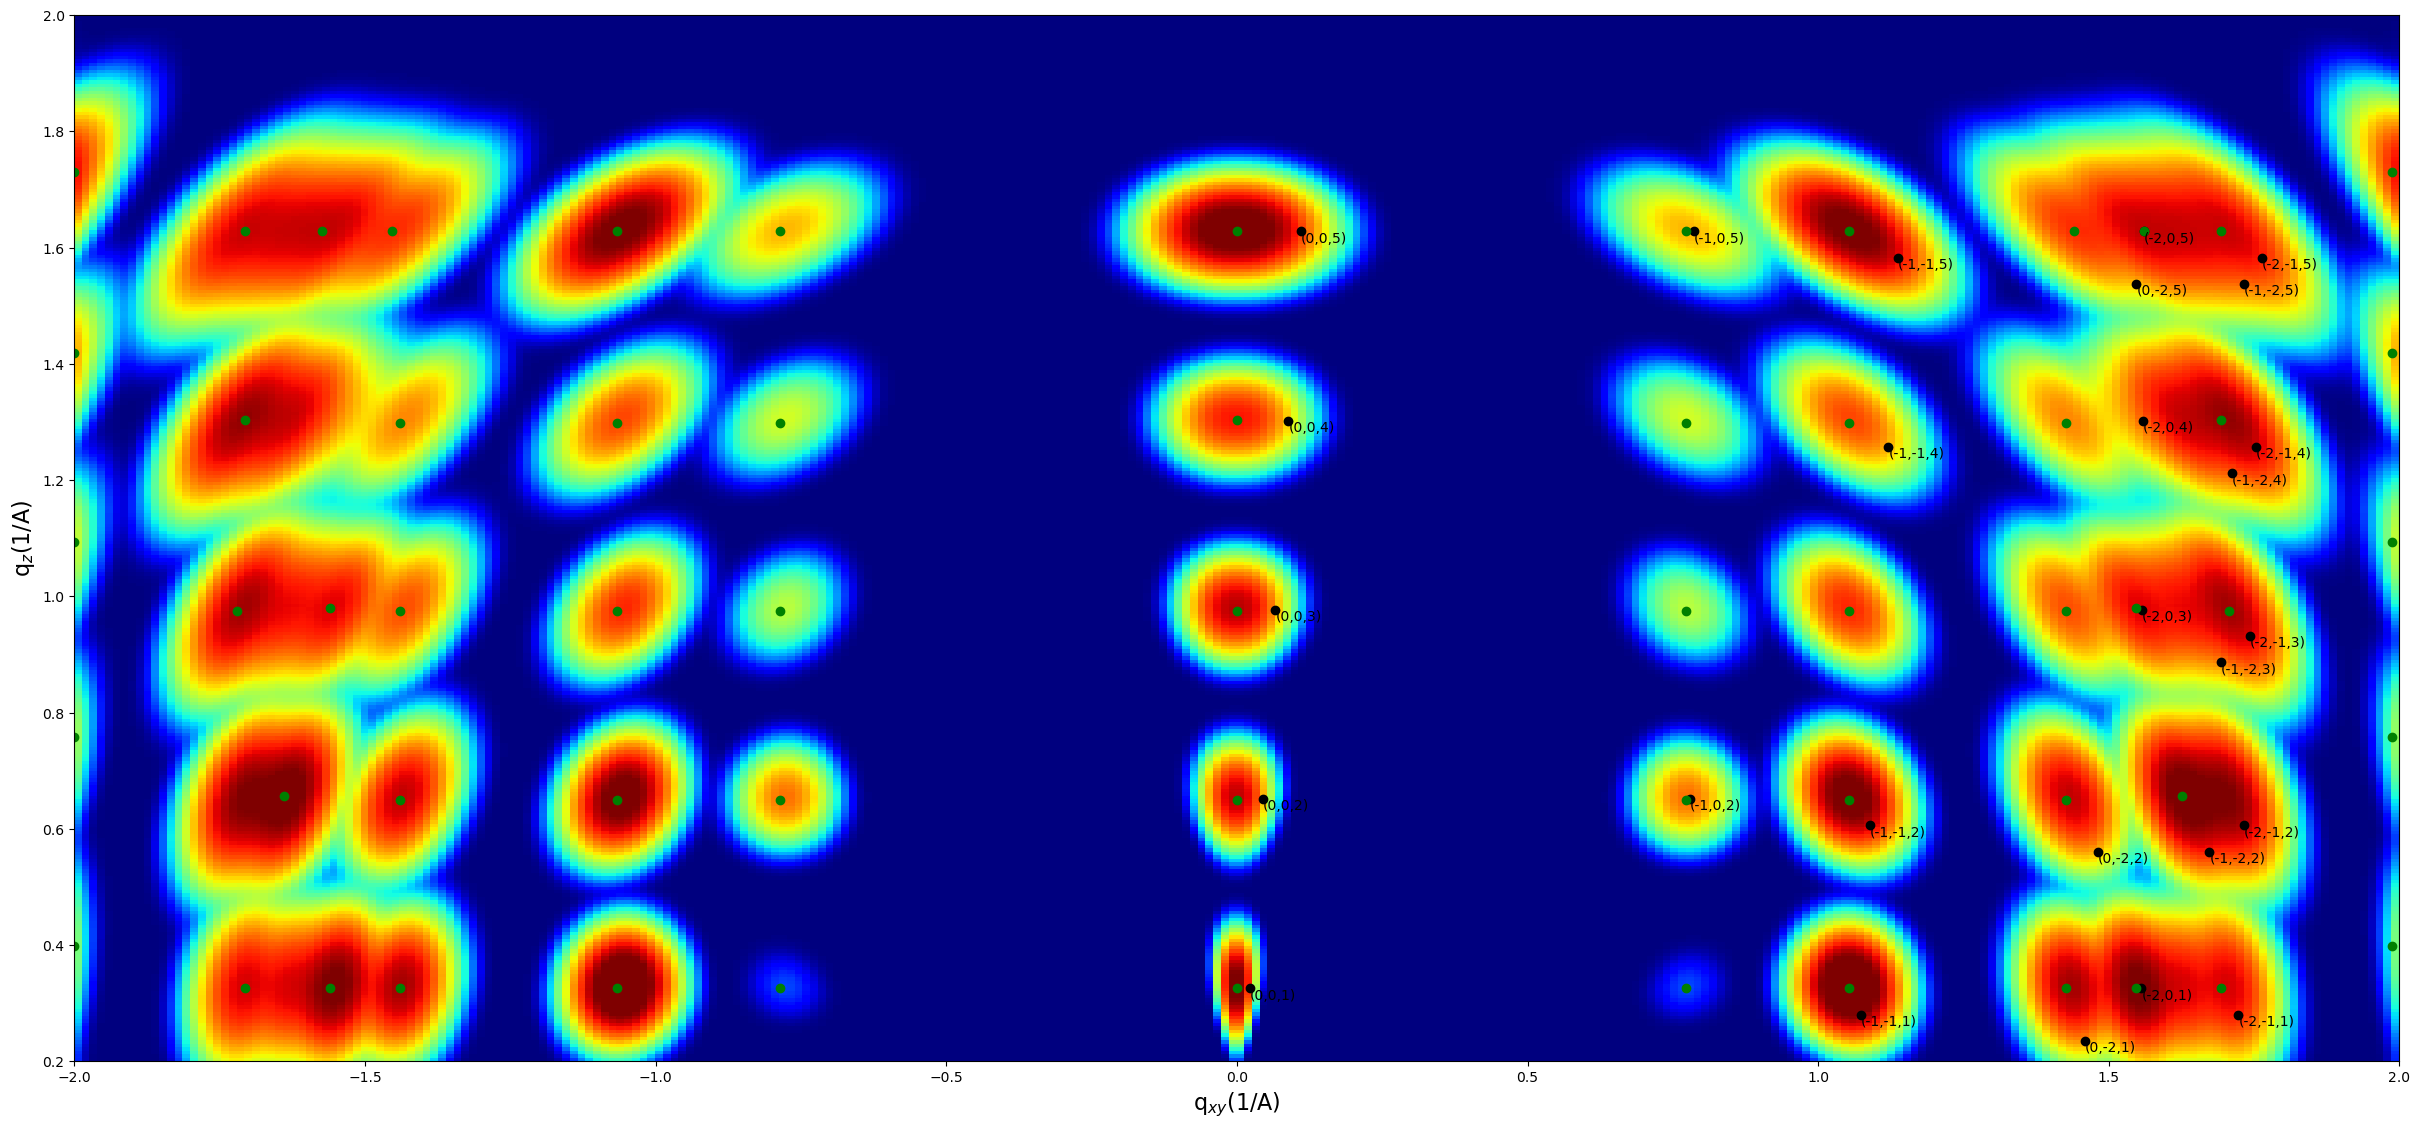

In [109]:
simuposi=phid1(0.96,data,exp_peak_postions)

In [106]:
def valfunc(x,y,x1,y1):
    val=0
    for i in range(x.size):
        valj0=100
        for j in range(x.size):
            valj=pow(x[j]-x1[i],2)+pow(y[j]-y1[i],2)
            valj0=np.minimum(valj0,valj)
        val=val+valj0
    return val
valfunc(simuposi[:,0],simuposi[:,1],exp_peak_postions[:,0],exp_peak_postions[:,1])

31.765743818277315

In [53]:
val0=100
j0=0.96
err=1
    
counter=0

while err>0.001:
    counter=counter+1
    j1=j0+(np.random.rand(1)-0.5)/10*0.1
    print(j1)
    simuposi=phid1(j1[0],data,exp_peak_postions)
    
    val=valfunc(simuposi[:,0],simuposi[:,1],exp_peak_postions[:,0],exp_peak_postions[:,1])
    if val<val0:
#         print(val,j1)
        j0=j1
        err=np.abs(val0-val)
        val0=val
        print(val0)
print(counter,'steps')
print('Lattic parameter',q1)
print('Orientation',j1)


In [59]:
# compare exp data with simulation

# load GIWAXS data and input qxy qz range
%matplotlib

# dirr = ''
filename = 'DD_002-D11_pos1_th0.250_15.00s_682959_waxs_stitched'

qxymax_exp=2
qxymin_exp=-1.5
qzmax_exp=2.5
qzmin_exp=0

qxymax_simu=2
qxymin_simu=-2
qzmax_simu=2
qzmin_simu=0

colorbar_simu=cm.jet
colorbar_exp=cm.jet
colorbar_lim_simu=0.01
colorbar_lim_exp=0.00000001

f = scipy.io.loadmat(filename+'.mat')
Giwaxs_data=f['a']
Giwaxs_data=np.array(Giwaxs_data)
# Giwaxs_data=np.flip(Giwaxs_data)
yp,xp=Giwaxs_data.shape

# plot orignal GIWAXS pattern
fig,ax=plt.subplots(figsize=(7,7))

expp=ax.imshow(Giwaxs_data, interpolation='nearest', cmap=colorbar_exp,
               origin='lower', extent=[qxymin_exp, qxymax_exp, qzmin_exp, qzmax_exp],
               vmax=colorbar_lim_exp*Giwaxs_data.max(), vmin=Giwaxs_data.min(),alpha=0.5)
fig.canvas.draw()

simp=ax.imshow(II1, interpolation='nearest', cmap=colorbar_simu,
               origin='lower', extent=[qxymin_simu, qxymax_simu, qzmin_simu, qzmax_simu],
               vmax=colorbar_lim_simu*II1.max(), vmin=II1.min(),alpha=0.5)
ax.set_xlabel('q$_{x}$',fontsize=16)
ax.set_ylabel('q$_{y}$',fontsize=16)
ax.set_title('C5',fontsize=16)

ax.set_xlim([min(qxymin_exp,qxymin_simu),max(qxymax_exp,qxymax_simu)])
ax.set_ylim([min(qzmin_exp,qzmin_simu),max(qzmax_exp,qzmax_simu)])


# plt.savefig('C:\\Users\z4794\Desktop\C5.pdf')


slider_ax = fig.add_axes([0.20, 0.1, 0.60, 0.03])
slider = RangeSlider(slider_ax, "Transparency", -1, 1)

def update(val):

    simp.set_alpha(val[1])
    expp.set_alpha(-val[0])
    fig.canvas.draw_idle()


slider.on_changed(update)
fig.show()

Using matplotlib backend: <object object at 0x7f8da8346170>


FileNotFoundError: [Errno 2] No such file or directory: 'DD_002-D11_pos1_th0.250_15.00s_682959_waxs_stitched.mat'